In [1]:
# Convert the equation as a string to a symbol object Sympy can work with.
def symbolize(s):
    from sympy import sympify
    #If I don't do this, I need to worry about python syntax more
    s1=s.replace('.','*')
    s2=s1.replace('^','**')
    
    #The expression, simplified, as a symbol object
    s3=sympify(s2)
    
    return(s3)

# Servers to evaluate the equation as the given values
def eval_multinomial(s,vals=None,symbolic_eval=False):
    """
    Evaluates polynomial at vals.
    vals can be simple list, dictionary, or tuple of values.
    vals can also contain symbols instead of real values provided those symbols have been declared before using SymPy
    """
    from sympy import Symbol
    #The equation get's fed to the first funct to make it a symb obj
    sym_s=symbolize(s)
    #Fetch atomic values
    sym_set=sym_s.atoms(Symbol)
    
    
    sym_lst=[]
    
    #Run through all the atomic values of the expression and organize them
    for s in sym_set:
        sym_lst.append(str(s))
    sym_lst.sort()
    #
    if symbolic_eval==False and len(sym_set)!=len(vals):
        print("Error: we avoid working with symb eq and our inputs must match our variables or this won't work")
        return None
    else:
        #Pairs are created here to evaluate the math exp
        sub=list(zip(sym_lst,vals))
        result=sym_s.subs(sub)
    return result


#The heavy work of actually taking in the equation, m, doing it for n_samples randomly selected values
#, some noise is added, and you can pick what kind of noise you want
def gen_regression_symbolic(m=None,n_samples=100, noise=0.0,noise_dist='normal'):
    
    import numpy as np
    from sympy import Symbol,sympify
    
    sym_m=sympify(m)
    
    #These are how many independent variables we got
    n_features=len(sym_m.atoms(Symbol))
    evals=[]
    lst_features=[]
    
    for i in range(n_features):
        lst_features.append(np.random.normal(scale=5,size=n_samples))
    lst_features=np.array(lst_features)
    lst_features=lst_features.T
    lst_features=lst_features.reshape(n_samples,n_features)
    
    for i in range(n_samples):
        evals.append(eval_multinomial(m,vals=list(lst_features[i])))
    
    evals=np.array(evals)
    evals=evals.reshape(n_samples,1)
    
    #Noise is Gaussian by default
    if noise_dist=='normal':
        noise_sample=noise*np.random.normal(loc=0,scale=1.0,size=n_samples)
    elif noise_dist=='uniform':
        noise_sample=noise*np.random.uniform(low=0,high=1.0,size=n_samples)
    elif noise_dist=='beta':
        noise_sample=noise*np.random.beta(a=0.5,b=1.0,size=n_samples)
    elif noise_dist=='Gamma':
        noise_sample=noise*np.random.gamma(shape=1.0,scale=1.0,size=n_samples)
    elif noise_dist=='laplace':
        noise_sample=noise*np.random.laplace(loc=0.0,scale=1.0,size=n_samples)
        
    noise_sample=noise_sample.reshape(n_samples,1)
    evals=evals+noise_sample
        
    x=np.hstack((lst_features,evals))
    
    #A ndarray is returned where the second column is the response
    return (x)


In [2]:
import pandas as pd
x=gen_regression_symbolic(m='x*(2*x+3)',n_samples=100,noise=30)
df=pd.DataFrame(x)
df.to_csv('out.csv' )
#sep='/'

In [3]:
df

,0,1
0,7.187048,92.2318297205936
1,6.767159,76.3578026415175
2,-10.29757,192.898386242084
3,4.000642,37.6669941021445
4,-0.197883,1.42204437496018
...,...,...
95,5.890877,75.6223129018841
96,0.673156,0.0743251232858615
97,-0.118435,-38.4235458888413
98,-1.781039,77.9321585863735


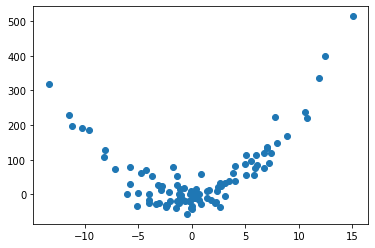

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df[0],df[1])
plt.show()

In [5]:
import pandas as pd
x=gen_regression_symbolic(m='x^2*(2*x+3)',n_samples=30,noise=30,noise_dist='beta')
df=pd.DataFrame(x)
df.to_csv('out2.csv' )
#sep='/'

In [6]:
df

,0,1
0,5.66802,479.584383341079
1,-0.902279,4.30813162999565
2,0.959387,4.57380979342838
3,2.983823,89.1526360774188
4,-2.041957,4.29309552398514
5,3.133085,118.323303514403
6,-1.998304,-0.524688708819156
7,-2.838194,-10.5501897259585
8,1.587838,29.5329287668333
9,1.99299,30.5717514786325


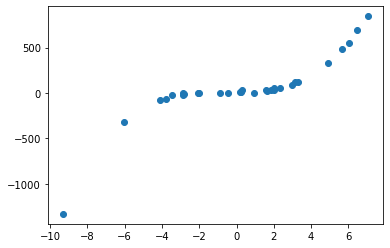

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df[0],df[1])
plt.show()

In [8]:
import pandas as pd
x=gen_regression_symbolic(m='cos(sin(tan(x)))',n_samples=500,noise=0,noise_dist='beta')
df=pd.DataFrame(x)
df.to_csv('out3.csv' )
#sep='/'

In [9]:
df

,0,1
0,-3.919558,0.672358168694459
1,-3.648934,0.863974703096503
2,-0.979736,0.543037270121731
3,2.527847,0.797497861437448
4,2.619801,0.855755635056801
...,...,...
495,-7.73004,0.552803694861332
496,1.062273,0.561002938642686
497,-5.992706,0.956946627977906
498,-0.390414,0.921053220650573


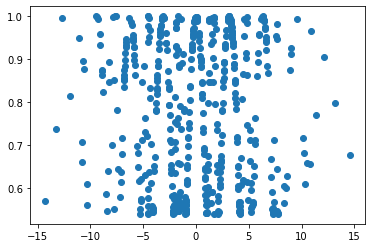

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df[0],df[1])
plt.show()

In [11]:
import pandas as pd
x=gen_regression_symbolic(m='3*x*sin(x)-x',n_samples=100,noise=1,noise_dist='Gamma')
df=pd.DataFrame(x)
df.to_csv('out4.csv' )
#sep='/'

In [12]:
df

,0,1
0,3.244776,-3.90401270828488
1,3.626437,-8.48859899488325
2,2.44804,3.77331122718897
3,-3.583911,-0.391159809542338
4,-6.208095,5.16780678196112
...,...,...
95,4.272819,-15.6258637892242
96,9.993648,-24.3883850234572
97,-3.893753,-3.84188481083932
98,-6.226291,10.0704084092405


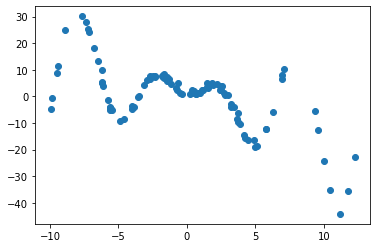

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df[0],df[1])
plt.show()

In [18]:
import pandas as pd
x=gen_regression_symbolic(m='x',n_samples=4,noise=1.3)
df=pd.DataFrame(x)
df.to_csv('out5.csv' )
#sep='/'

In [19]:
df

,0,1
0,-12.570376,-14.0071265828001
1,-0.967286,1.70330624285416
2,0.352835,2.97003056175650
3,-2.098715,-0.527216804980865


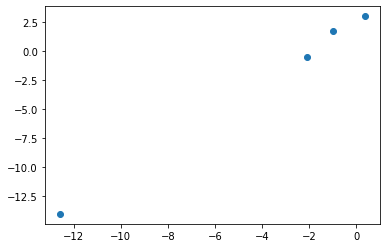

In [20]:
import matplotlib.pyplot as plt
plt.scatter(df[0],df[1])
plt.show()